In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings

from sympy.matrices.tests.test_matrixbase import all_classes

warnings.filterwarnings('ignore')
%matplotlib inline

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [ ]:
# Load the data
df = pd.read_excel('/home/ubuntu/deep_learning_exam2/excel/train_test.xlsx')

In [22]:
print("\n" + "=" * 80)
print("1. DATASET OVERVIEW")
print("=" * 80)
print(f"\nTotal number of images: {len(df)}")
print(f"Number of columns: {len(df.columns)}")
print(f"\nColumn names: {list(df.columns)}")
print(f"\nDataset shape: {df.shape}")


1. DATASET OVERVIEW

Total number of images: 78303
Number of columns: 4

Column names: ['id', 'target', 'split', 'target_class']

Dataset shape: (78303, 4)


In [26]:
print("\n" + "=" * 80)
print("2. SAMPLE DATA")
print("=" * 80)
df.head(10)


2. SAMPLE DATA


,id,target,split,target_class
0,img_40307.jpg,"class3,class5",train,"0,0,1,0,1,0,0,0,0,0"
1,img_10443.jpg,"class4,class5",train,"0,0,0,1,1,0,0,0,0,0"
2,img_40036.jpg,class4,train,"0,0,0,1,0,0,0,0,0,0"
3,img_14231.jpg,"class4,class5,class7",train,"0,0,0,1,1,0,1,0,0,0"
4,img_75040.jpg,"class3,class4,class5,class6,class9",train,"0,0,1,1,1,1,0,0,1,0"
5,img_80640.jpg,"class4,class5",train,"0,0,0,1,1,0,0,0,0,0"
6,img_3340.jpg,class5,train,"0,0,0,0,1,0,0,0,0,0"
7,img_30772.jpg,"class4,class5,class7",train,"0,0,0,1,1,0,1,0,0,0"
8,img_9546.jpg,"class3,class4,class5",train,"0,0,1,1,1,0,0,0,0,0"
9,img_42218.jpg,"class2,class4,class8",train,"0,1,0,1,0,0,0,1,0,0"


In [24]:
# Data types
print("\n" + "=" * 80)
print("3. DATA TYPES")
print("=" * 80)
print(df.dtypes)


3. DATA TYPES
id              object
target          object
split           object
target_class    object
dtype: object


In [25]:
# Check for missing values
print("\n" + "=" * 80)
print("4. MISSING VALUES")
print("=" * 80)
print(f"\nMissing values per column:")
print(df.isnull().sum())
print(f"\nTotal missing values: {df.isnull().sum().sum()}")


4. MISSING VALUES

Missing values per column:
id              0
target          0
split           0
target_class    0
dtype: int64

Total missing values: 0


In [38]:
print("\n" + "=" * 80)
print("5. TRAIN/TEST SPLIT ANALYSIS")
print("=" * 80)

split_counts = df['split'].value_counts()
print(f"\nSplit distribution:")
print(split_counts)

split_percentages = df['split'].value_counts(normalize=True) * 100
print(f"\nSplit percentages:")
print(split_percentages)



5. TRAIN/TEST SPLIT ANALYSIS

Split distribution:
split
train    69603
test      8700
Name: count, dtype: int64

Split percentages:
split
train    88.889315
test     11.110685
Name: proportion, dtype: float64


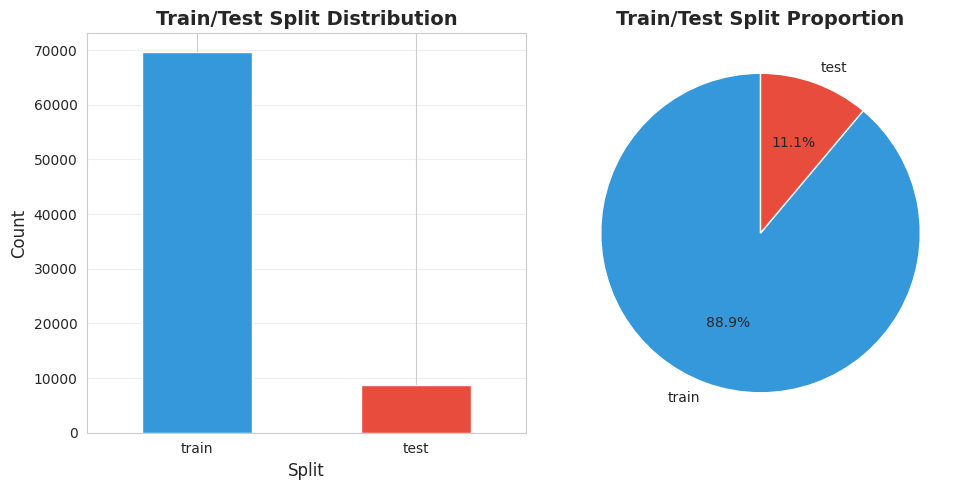


✓ Saved: train_test_split.png


In [19]:
# Train/test split visualization
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
split_counts.plot(kind='bar', color=['#3498db', '#e74c3c'])
plt.title('Train/Test Split Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Split', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)

plt.subplot(1, 2, 2)
plt.pie(split_counts.values, labels=split_counts.index, autopct='%1.1f%%',
        startangle=90, colors=['#3498db', '#e74c3c'])
plt.title('Train/Test Split Proportion', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()
plt.savefig('train_test_split.png', dpi=300, bbox_inches='tight')
plt.close()
print("\n✓ Saved: train_test_split.png")

In [20]:
print("\n" + "=" * 80)
print("6. TARGET LABELS ANALYSIS")
print("=" * 80)

# Parse one-hot encoded target_class
# The target_class column contains the one-hot encoding
# We need to extract individual class columns

# Class names
class_names = [f'class{i+1}' for i in range(10)]
print(f"\nClass names: {class_names}")


6. TARGET LABELS ANALYSIS

Class names: ['class1', 'class2', 'class3', 'class4', 'class5', 'class6', 'class7', 'class8', 'class9', 'class10']


In [28]:
# Parse target column to count class occurrences
all_classes = []
for target in df['target']:
    classes = [cls.strip() for cls in str(target).split(',')]
    all_classes.extend(classes)

class_counts = Counter(all_classes)
class_counts_sorted = dict(sorted(class_counts.items(), key=lambda x: int(x[0].replace('class', ''))))

print(f"\n" + "-" * 60)
print("Class Distribution (Total Dataset)")
print("-" * 60)
for class_name, count in class_counts_sorted.items():
    percentage = (count / len(df)) * 100
    print(f"{class_name:10s}: {count:5d} images ({percentage:5.2f}%)")



------------------------------------------------------------
Class Distribution (Total Dataset)
------------------------------------------------------------
class1    :    35 images ( 0.04%)
class2    : 12188 images (15.57%)
class3    : 26665 images (34.05%)
class4    : 28792 images (36.77%)
class5    : 48264 images (61.64%)
class6    :  5681 images ( 7.26%)
class7    : 17827 images (22.77%)
class8    :  9231 images (11.79%)
class9    :  6860 images ( 8.76%)
class10   :  5709 images ( 7.29%)


In [30]:
print("\n" + "=" * 80)
print("7. MULTI-LABEL STATISTICS")
print("=" * 80)

# Count number of labels per image
df['num_labels'] = df['target'].apply(lambda x: len(str(x).split(',')))

print(f"\nNumber of labels per image:")
print(df['num_labels'].describe())

print(f"\nDistribution of label counts:")
label_count_dist = df['num_labels'].value_counts().sort_index()
for num_labels, count in label_count_dist.items():
    percentage = (count / len(df)) * 100
    print(f"  {num_labels} label(s): {count:5d} images ({percentage:5.2f}%)")


7. MULTI-LABEL STATISTICS

Number of labels per image:
count    78303.000000
mean         2.059334
std          1.164698
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          8.000000
Name: num_labels, dtype: float64

Distribution of label counts:
  1 label(s): 30366 images (38.78%)
  2 label(s): 26312 images (33.60%)
  3 label(s): 13461 images (17.19%)
  4 label(s):  4565 images ( 5.83%)
  5 label(s):  2275 images ( 2.91%)
  6 label(s):  1048 images ( 1.34%)
  7 label(s):   252 images ( 0.32%)
  8 label(s):    24 images ( 0.03%)


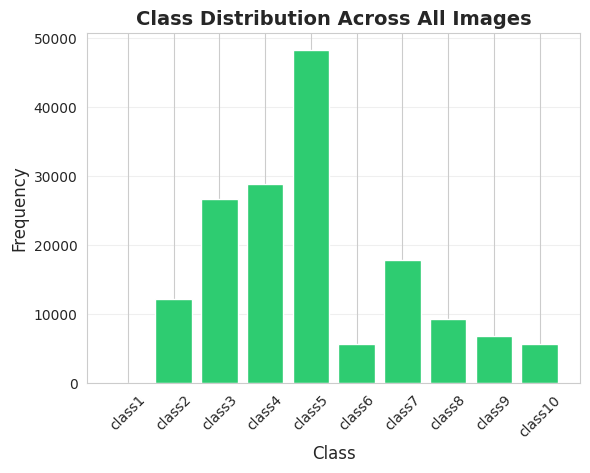

In [31]:
plt.figure(figsize=(14, 10))

# Subplot 1: Class distribution
plt.subplot(2, 2, 1)
class_names_sorted = list(class_counts_sorted.keys())
class_values_sorted = list(class_counts_sorted.values())
plt.bar(range(len(class_names_sorted)), class_values_sorted, color='#2ecc71')
plt.xlabel('Class', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Class Distribution Across All Images', fontsize=14, fontweight='bold')
plt.xticks(range(len(class_names_sorted)), class_names_sorted, rotation=45)
plt.grid(axis='y', alpha=0.3)

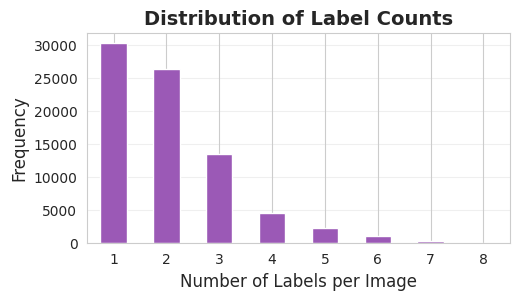

In [32]:
# Subplot 2: Labels per image
plt.subplot(2, 2, 2)
df['num_labels'].value_counts().sort_index().plot(kind='bar', color='#9b59b6')
plt.xlabel('Number of Labels per Image', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Label Counts', fontsize=14, fontweight='bold')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)

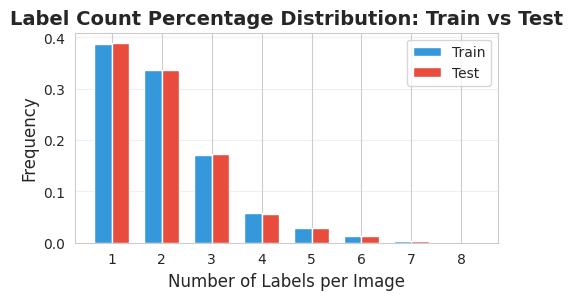

In [40]:
# Subplot 3: Labels per image (train vs test)
plt.subplot(2, 2, 3)
train_labels = df[df['split'] == 'train']['num_labels'].value_counts().sort_index()
test_labels = df[df['split'] == 'test']['num_labels'].value_counts().sort_index()

x = np.arange(len(train_labels.index))
width = 0.35
plt.bar(x - width/2, train_labels.values/sum(train_labels.values), width, label='Train', color='#3498db')
plt.bar(x + width/2, test_labels.values/sum(test_labels.values), width, label='Test', color='#e74c3c')
plt.xlabel('Number of Labels per Image', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Label Count Percentage Distribution: Train vs Test', fontsize=14, fontweight='bold')
plt.xticks(x, train_labels.index)
plt.legend()
plt.grid(axis='y', alpha=0.3)

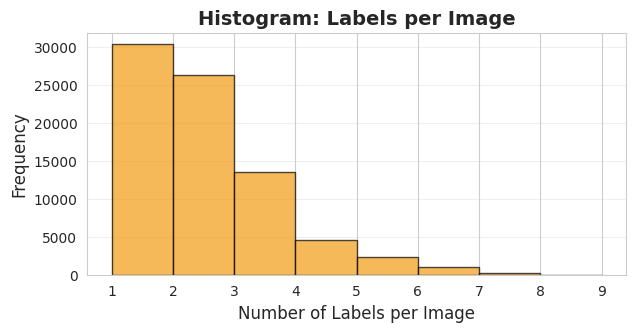


✓ Saved: label_analysis.png


In [42]:
# Subplot 4: Histogram of label counts
plt.subplot(2, 2, 4)
plt.hist(df['num_labels'], bins=range(1, df['num_labels'].max() + 2),
         color='#f39c12', edgecolor='black', alpha=0.7)
plt.xlabel('Number of Labels per Image', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Histogram: Labels per Image', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()
plt.savefig('label_analysis.png', dpi=300, bbox_inches='tight')
plt.close()
print("\n✓ Saved: label_analysis.png")

In [47]:
print("\n" + "=" * 80)
print("8. CLASS CO-OCCURRENCE ANALYSIS")
print("=" * 80)

# Create co-occurrence matrix
from itertools import combinations

co_occurrence = np.zeros((10, 10))

for target in df['target']:
    classes = [int(cls.strip().replace('class', '')) - 1 for cls in str(target).split(',')]
    for c1, c2 in combinations(classes, 2):
        co_occurrence[c1, c2] += 1
        co_occurrence[c2, c1] += 1



8. CLASS CO-OCCURRENCE ANALYSIS


In [48]:
co_occurrence

array([[0.0000e+00, 0.0000e+00, 2.0000e+00, 2.0000e+00, 5.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
       [0.0000e+00, 0.0000e+00, 4.2090e+03, 3.9630e+03, 6.5780e+03,
        1.4800e+03, 1.2560e+03, 2.1490e+03, 1.4100e+03, 1.0860e+03],
       [2.0000e+00, 4.2090e+03, 0.0000e+00, 8.5620e+03, 1.8544e+04,
        3.8950e+03, 2.4240e+03, 1.3290e+03, 3.8420e+03, 2.7590e+03],
       [2.0000e+00, 3.9630e+03, 8.5620e+03, 0.0000e+00, 1.8095e+04,
        3.3290e+03, 1.3198e+04, 1.3840e+03, 3.1730e+03, 2.5450e+03],
       [5.0000e+00, 6.5780e+03, 1.8544e+04, 1.8095e+04, 0.0000e+00,
        4.6190e+03, 9.0250e+03, 2.4520e+03, 4.4900e+03, 3.9640e+03],
       [0.0000e+00, 1.4800e+03, 3.8950e+03, 3.3290e+03, 4.6190e+03,
        0.0000e+00, 7.0100e+02, 2.8900e+02, 3.3470e+03, 1.5640e+03],
       [1.0000e+00, 1.2560e+03, 2.4240e+03, 1.3198e+04, 9.0250e+03,
        7.0100e+02, 0.0000e+00, 1.4900e+02, 4.5600e+02, 4.3800e+02],
       [0.0000e+00, 2.1490e+03, 1.3290e+0

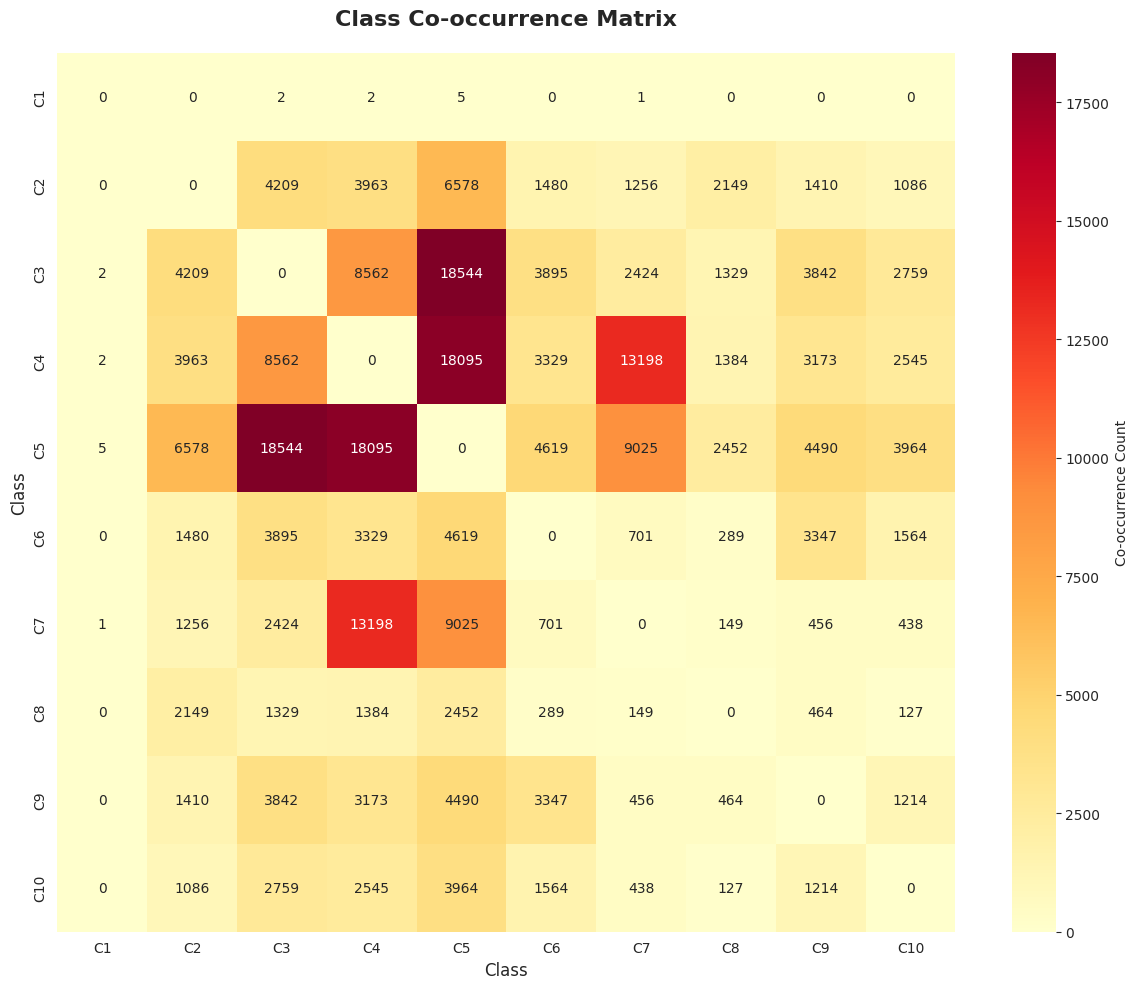


✓ Saved: co_occurrence_matrix.png


In [49]:
plt.figure(figsize=(12, 10))
sns.heatmap(co_occurrence, annot=True, fmt='.0f', cmap='YlOrRd',
            xticklabels=[f'C{i+1}' for i in range(10)],
            yticklabels=[f'C{i+1}' for i in range(10)],
            cbar_kws={'label': 'Co-occurrence Count'})
plt.title('Class Co-occurrence Matrix', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Class', fontsize=12)
plt.ylabel('Class', fontsize=12)
plt.tight_layout()
plt.show()
plt.savefig('co_occurrence_matrix.png', dpi=300, bbox_inches='tight')
plt.close()
print("\n✓ Saved: co_occurrence_matrix.png")

In [45]:
# Find most common class combinations
print(f"\nTop 10 most common class combinations:")
target_combinations = df['target'].value_counts().head(10)
for i, (combination, count) in enumerate(target_combinations.items(), 1):
    percentage = (count / len(df)) * 100
    print(f"  {i:2d}. {combination:30s}: {count:4d} ({percentage:5.2f}%)")


Top 10 most common class combinations:
   1. class5                        : 12831 (16.39%)
   2. class3,class5                 : 7513 ( 9.59%)
   3. class4,class7                 : 6667 ( 8.51%)
   4. class8                        : 5239 ( 6.69%)
   5. class3                        : 4964 ( 6.34%)
   6. class4,class5,class7          : 4671 ( 5.97%)
   7. class4,class5                 : 3493 ( 4.46%)
   8. class3,class4,class5          : 2629 ( 3.36%)
   9. class2                        : 2586 ( 3.30%)
  10. class5,class7                 : 1606 ( 2.05%)


In [50]:
print("\n" + "=" * 80)
print("9. TRAIN VS TEST CLASS DISTRIBUTION COMPARISON")
print("=" * 80)

train_df = df[df['split'] == 'train']
test_df = df[df['split'] == 'test']

# Count classes in train and test
train_classes = []
for target in train_df['target']:
    classes = [cls.strip() for cls in str(target).split(',')]
    train_classes.extend(classes)

test_classes = []
for target in test_df['target']:
    classes = [cls.strip() for cls in str(target).split(',')]
    test_classes.extend(classes)

train_class_counts = Counter(train_classes)
test_class_counts = Counter(test_classes)

print(f"\nClass distribution comparison:")
print(f"{'Class':10s} {'Train':>10s} {'Test':>10s} {'Train %':>10s} {'Test %':>10s}")
print("-" * 60)
for class_name in sorted(train_class_counts.keys(), key=lambda x: int(x.replace('class', ''))):
    train_count = train_class_counts[class_name]
    test_count = test_class_counts.get(class_name, 0)
    train_pct = (train_count / len(train_df)) * 100
    test_pct = (test_count / len(test_df)) * 100 if len(test_df) > 0 else 0
    print(f"{class_name:10s} {train_count:10d} {test_count:10d} {train_pct:9.2f}% {test_pct:9.2f}%")



9. TRAIN VS TEST CLASS DISTRIBUTION COMPARISON

Class distribution comparison:
Class           Train       Test    Train %     Test %
------------------------------------------------------------
class1             31          4      0.04%      0.05%
class2          10846       1342     15.58%     15.43%
class3          23671       2994     34.01%     34.41%
class4          25631       3161     36.82%     36.33%
class5          42840       5424     61.55%     62.34%
class6           5078        603      7.30%      6.93%
class7          15902       1925     22.85%     22.13%
class8           8189       1042     11.77%     11.98%
class9           6141        719      8.82%      8.26%
class10          5083        626      7.30%      7.20%


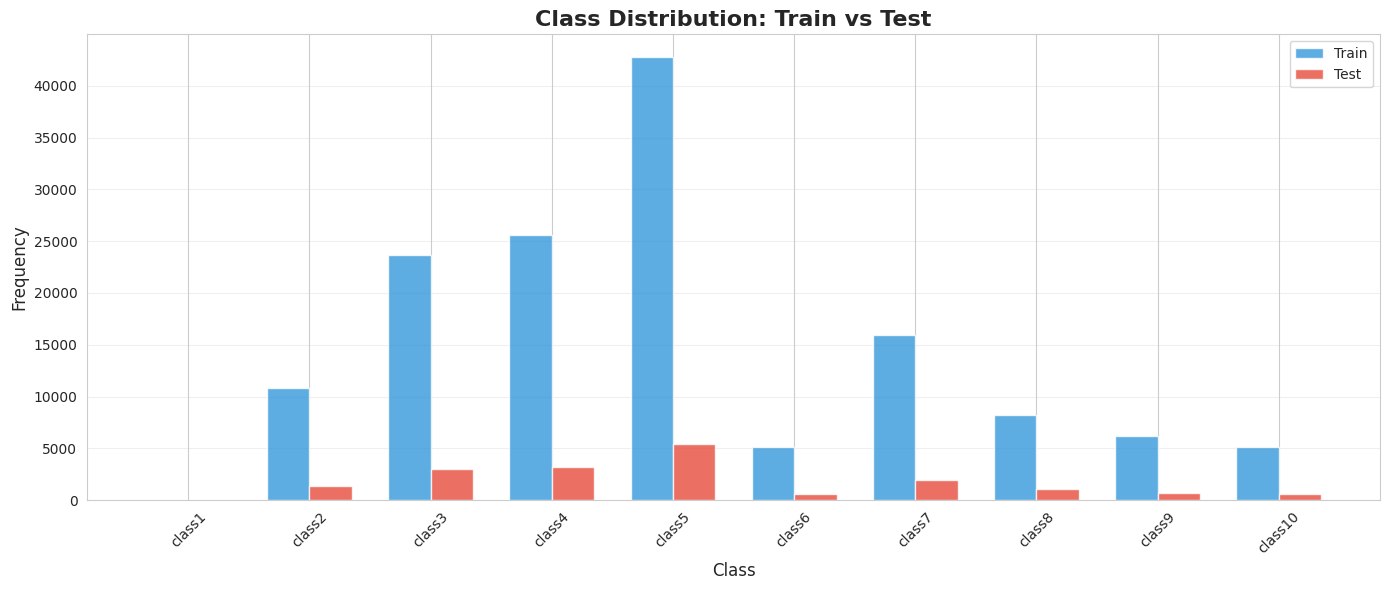


✓ Saved: train_test_class_distribution.png


In [51]:
plt.figure(figsize=(14, 6))

classes_sorted = sorted(train_class_counts.keys(), key=lambda x: int(x.replace('class', '')))
train_values = [train_class_counts[c] for c in classes_sorted]
test_values = [test_class_counts.get(c, 0) for c in classes_sorted]

x = np.arange(len(classes_sorted))
width = 0.35

plt.bar(x - width/2, train_values, width, label='Train', color='#3498db', alpha=0.8)
plt.bar(x + width/2, test_values, width, label='Test', color='#e74c3c', alpha=0.8)
plt.xlabel('Class', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Class Distribution: Train vs Test', fontsize=16, fontweight='bold')
plt.xticks(x, classes_sorted, rotation=45)
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()
plt.savefig('train_test_class_distribution.png', dpi=300, bbox_inches='tight')
plt.close()
print("\n✓ Saved: train_test_class_distribution.png")

In [54]:
print("\n" + "=" * 80)
print("10. CLASS IMBALANCE ANALYSIS")
print("=" * 80)

# Calculate imbalance ratio
max_class_count = max(class_counts_sorted.values())
min_class_count = min(class_counts_sorted.values())
imbalance_ratio = max_class_count / min_class_count

print(f"\nMost frequent class: {max([k for k, v in class_counts_sorted.items() if v == max_class_count])} with {max_class_count} occurrences")
print(f"Least frequent class: {min([k for k, v in class_counts_sorted.items() if v == min_class_count])} with {min_class_count} occurrences")
print(f"Imbalance ratio: {imbalance_ratio:.2f}:1")

# Calculate normalized frequencies
class_frequencies = {k: v / len(df) for k, v in class_counts_sorted.items()}
print(f"\nNormalized class frequencies:")
for class_name, freq in class_frequencies.items():
    print(f"  {class_name}: {freq:.4f}")


10. CLASS IMBALANCE ANALYSIS

Most frequent class: class5 with 48264 occurrences
Least frequent class: class1 with 35 occurrences
Imbalance ratio: 1378.97:1

Normalized class frequencies:
  class1: 0.0004
  class2: 0.1557
  class3: 0.3405
  class4: 0.3677
  class5: 0.6164
  class6: 0.0726
  class7: 0.2277
  class8: 0.1179
  class9: 0.0876
  class10: 0.0729


In [55]:
print("\n" + "=" * 80)
print("11. SUMMARY STATISTICS")
print("=" * 80)

print(f"\nDataset Summary:")
print(f"  Total images: {len(df)}")
print(f"  Training images: {len(train_df)}")
print(f"  Test images: {len(test_df)}")
print(f"  Number of classes: 10")
print(f"  Average labels per image: {df['num_labels'].mean():.2f}")
print(f"  Median labels per image: {df['num_labels'].median():.0f}")
print(f"  Min labels per image: {df['num_labels'].min()}")
print(f"  Max labels per image: {df['num_labels'].max()}")
print(f"  Class imbalance ratio: {imbalance_ratio:.2f}:1")


11. SUMMARY STATISTICS

Dataset Summary:
  Total images: 78303
  Training images: 69603
  Test images: 8700
  Number of classes: 10
  Average labels per image: 2.06
  Median labels per image: 2
  Min labels per image: 1
  Max labels per image: 8
  Class imbalance ratio: 1378.97:1
